In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [2]:
ori_data = pd.read_csv('Dataset/sign_mnist_train.csv')
print('Dataframe Shape:', ori_data.shape)

Dataframe Shape: (27455, 785)


In [3]:
x = ori_data.iloc[:, 1:].values
print('Feature matrix:\n', x)
print('Shape of Feature matrix:', x.shape)

Feature matrix:
 [[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]
Shape of Feature matrix: (27455, 784)


In [4]:
y = ori_data.iloc[:, :1].values.flatten()
print('Labels:\n', y)
print('Shape of Labels:', y.shape)

Labels:
 [ 3  6  2 ... 18 17 23]
Shape of Labels: (27455,)


In [5]:
def display(index):
    plt.imshow(x[index].reshape(28, 28), cmap = 'gray')
    plt.title(str(y[index]))
    plt.show()

In [6]:
def one_hot_encode(y):
    return np.eye(25)[y]
y_encoded = one_hot_encode(y)
print('Shape of y after encoding:', y_encoded.shape)

Shape of y after encoding: (27455, 25)


In [7]:
# Hyperparameters
learning_rate = 0.001
batch_size = 128
epochs = 10000 
display_step = 500

In [8]:
# Network Hyperparameters
n_inputs = 784
nh1 = 256
nh2 = 256
nh3 = 256
nh4 = 256
nh5 = 256
n_outputs = 25

In [9]:
X = tf.placeholder('float', [None, n_inputs])
Y = tf.placeholder('float', [None, n_outputs])

In [10]:
weights = {
    'w1' : tf.Variable(tf.random_normal([n_inputs, nh1])),
    'w2' : tf.Variable(tf.random_normal([nh1, nh2])),
    'w3' : tf.Variable(tf.random_normal([nh2, nh3])),
    'w4' : tf.Variable(tf.random_normal([nh3, nh4])),
    'w5' : tf.Variable(tf.random_normal([nh4, nh5])),
    'out_w' : tf.Variable(tf.random_normal([nh5, n_outputs]))
}

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
biases = {
    'b1' : tf.Variable(tf.random_normal([nh1])),
    'b2' : tf.Variable(tf.random_normal([nh2])),
    'b3' : tf.Variable(tf.random_normal([nh3])),
    'b4' : tf.Variable(tf.random_normal([nh4])),
    'b5' : tf.Variable(tf.random_normal([nh5])),
    'out_b' : tf.Variable(tf.random_normal([n_outputs]))
}

In [12]:
def neural_network(x, weights, biases):
    layer1 = tf.nn.relu(tf.add(tf.matmul(x, weights['w1']), biases['b1']))
    layer2 = tf.nn.relu(tf.add(tf.matmul(layer1, weights['w2']), biases['b2']))
    layer3 = tf.nn.relu(tf.add(tf.matmul(layer2, weights['w3']), biases['b3']))
    layer4 = tf.nn.relu(tf.add(tf.matmul(layer3, weights['w4']), biases['b4']))
    layer5 = tf.nn.relu(tf.add(tf.matmul(layer4, weights['w5']), biases['b5']))
    layer_out = tf.matmul(layer5, weights['out_w']) + biases['out_b']
    return layer_out

In [13]:
logits = neural_network(X, weights, biases)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss_op)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [14]:
init = tf.global_variables_initializer()

In [15]:
def next_batch(batch_size, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx = idx[: batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [16]:
start_time = time.time();
last_time = 0;
with tf.Session() as sess:
    
    sess.run(init)
    
    cost_hist, acc_hist = [], []
    
    for epoch in range(1, epochs + 1):
        batch_x, batch_y = next_batch(batch_size, x, y_encoded)
        
        sess.run(training_op, feed_dict = { X : batch_x, Y : batch_y })
        
        if epoch % display_step == 0:
            c, acc = sess.run([loss_op, accuracy], feed_dict = { X : batch_x, Y : batch_y })
            cost_hist.append(c)
            acc_hist.append(acc)
            #print('Epoch ' + str(epoch) + ', Cost: ' + str(c) + ', Accuracy: ' + str(acc) + ', time spent: '+ str((time.time() - start_time)))
            if last_time != 0:
                print('Epoch ' + str(epoch) + ', Cost: ' + str(c) + ', Accuracy: ' + str(acc) + ', time spent: '+ str((time.time() - start_time)))
            else:
                print('Epoch ' + str(epoch) + ', Cost: ' + str(c) + ', Accuracy: ' + str(acc) + ', time spent: '+ str((time.time() - last_time)))
                
            last_time = time.time();
    
    W = sess.run(weights)
    B = sess.run(biases)
    print('Accuracy on train data: ' + str(sess.run(accuracy, feed_dict = { X : x, Y : y_encoded }) * 100) + ' %')
    print('time spent: '+ str((time.time() - start_time)))

Epoch 500, Cost: 12179082.0, Accuracy: 0.6328125, time spent: 1557817807.8294942
Epoch 1000, Cost: 3249961.5, Accuracy: 0.8046875, time spent: 7.377263307571411
Epoch 1500, Cost: 332113.0, Accuracy: 0.96875, time spent: 10.834015607833862
Epoch 2000, Cost: 107374.25, Accuracy: 0.96875, time spent: 14.342628717422485
Epoch 2500, Cost: 219820.62, Accuracy: 0.9921875, time spent: 17.92205262184143
Epoch 3000, Cost: 263812.12, Accuracy: 0.984375, time spent: 21.441636562347412
Epoch 3500, Cost: 0.0, Accuracy: 1.0, time spent: 25.20756196975708
Epoch 4000, Cost: 52168.25, Accuracy: 0.984375, time spent: 28.96351408958435
Epoch 4500, Cost: 0.0, Accuracy: 1.0, time spent: 32.673587799072266
Epoch 5000, Cost: 34689.75, Accuracy: 0.9921875, time spent: 36.41557717323303
Epoch 5500, Cost: 0.0, Accuracy: 1.0, time spent: 40.04785919189453
Epoch 6000, Cost: 0.0, Accuracy: 1.0, time spent: 43.61332082748413
Epoch 6500, Cost: 0.0, Accuracy: 1.0, time spent: 47.18277168273926
Epoch 7000, Cost: 118499

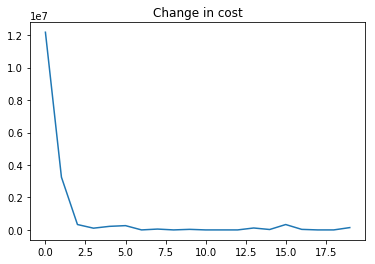

In [17]:
plt.plot(list(range(len(cost_hist))), cost_hist)
plt.title("Change in cost")
plt.show()

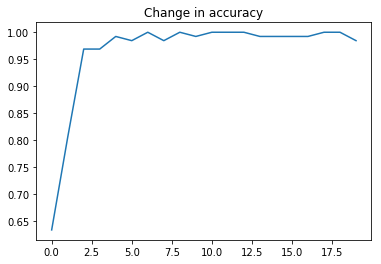

In [19]:
plt.plot(list(range(len(acc_hist))), acc_hist)
plt.title("Change in accuracy")
plt.show() 
#plt.show()